In [1]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import pie, axis, show

import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df = pd.read_csv('dataset_thonny_logs.csv') 


df_score_student_ID = pd.read_csv('id-log_voto.csv', sep=';') 



c:\users\alexf\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (22,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
def display_all(df):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(df)
display_all(df.head())

,view_id,view_class,sequence,time,student_ID,score,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,widget_class,index,text,tags,trivial_for_coloring,trivial_for_parens,text_widget_context,index1,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
0,ShellView,ShellView,ShowView,2020-03-23T14:33:24.525803,1,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AssistantView,AssistantView,ShowView,2020-03-23T14:33:24.543817,1,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,EditorTextCreated,2020-03-23T14:33:24.578842,1,pass,75874928.0,Editor,75874448.0,CodeViewText,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NewFile,2020-03-23T14:33:24.579842,1,pass,75874928.0,Editor,75874448.0,CodeViewText,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ShellView,ShellView,ShowView,2020-03-23T14:33:24.579842,1,pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_ID,2109852.0,5.675441e+01,3.104495e+01,1.0,29.0,61.00,84.0,1.060000e+02
editor_id,25441.0,2.639104e+12,1.904507e+13,1598960.0,69954960.0,80989936.00,126304112.0,1.406988e+14
text_widget_id,1867024.0,2.664113e+12,1.913259e+13,1597616.0,70588944.0,79953360.00,143695184.0,1.406988e+14
widget_id,290403.0,1.778618e+12,1.568397e+13,1597616.0,55807184.0,73061136.00,87054992.0,1.406989e+14
index,1474109.0,1.039818e+03,1.755312e+03,1.0,9.2,38.48,1491.0,6.981000e+03
index1,251750.0,5.023904e+01,2.589974e+02,1.0,5.9,13.11,34.0,6.812000e+03


# Information about Missing values


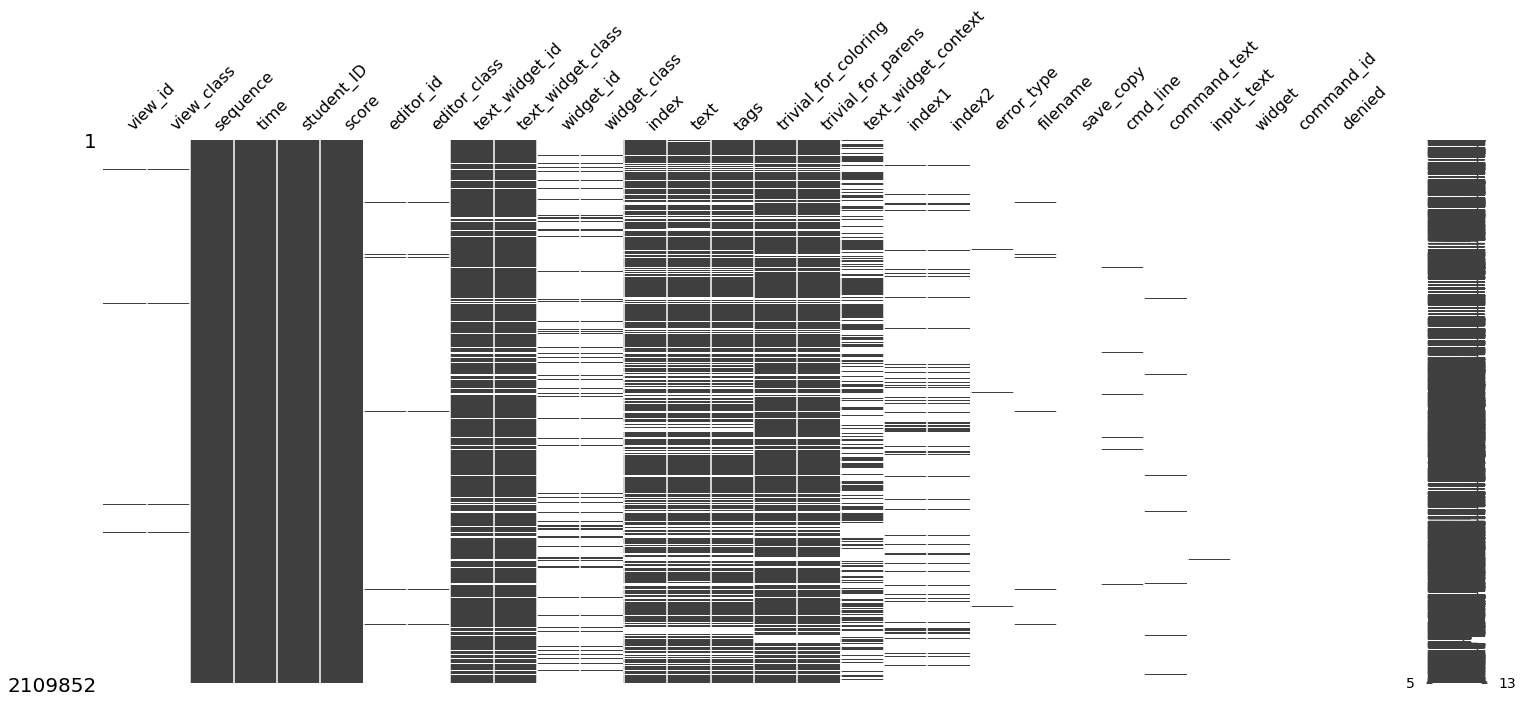

In [6]:
msno.matrix(df)
plt.show()

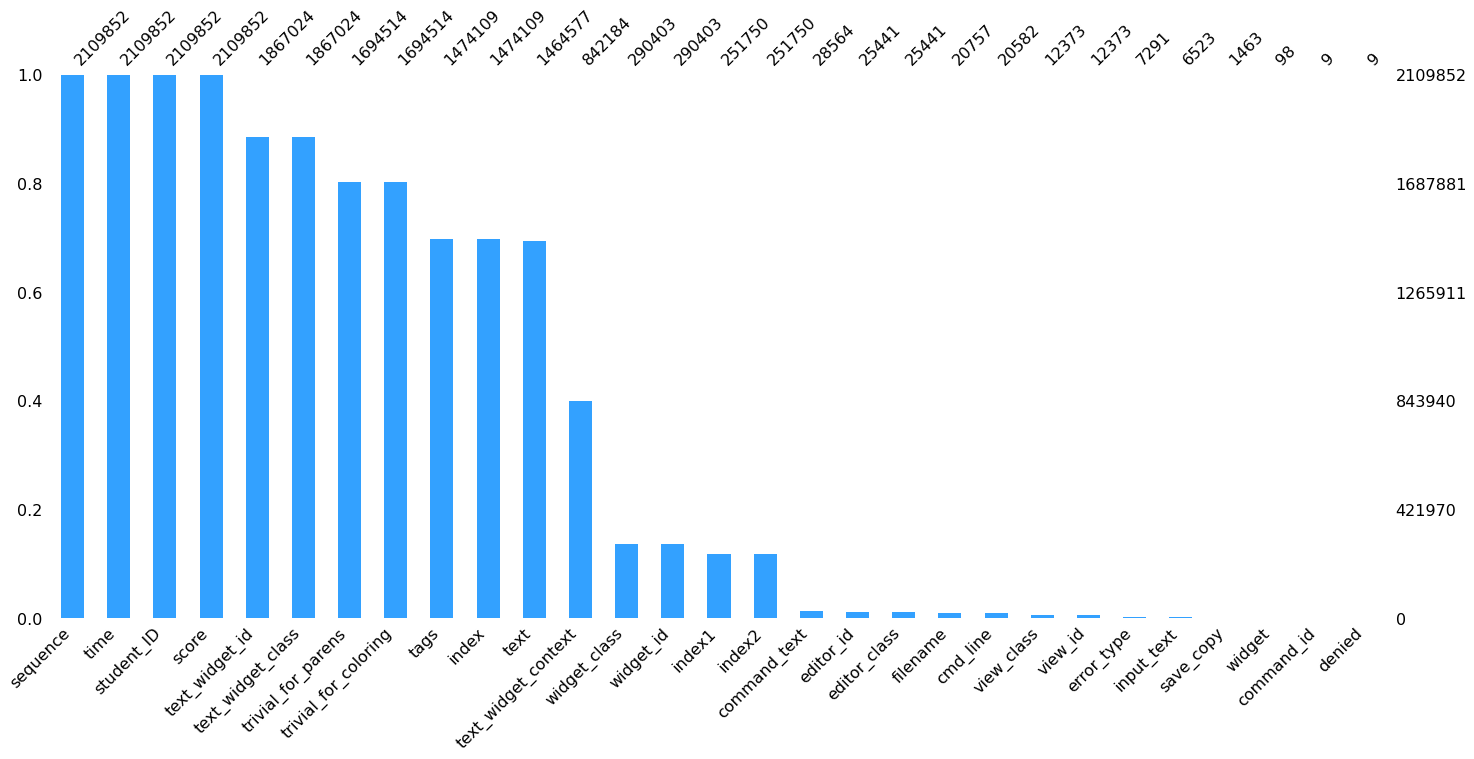

In [7]:
msno.bar(df,sort='descending',color='#33A1FF')
plt.show()

In [8]:
def Missing_Values(df):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in df.columns:
        variable_name.append(col)
        data_type.append(df[col].dtype)
        total_value.append(df[col].shape[0])
        total_missing_value.append(df[col].isnull().sum())
        missing_value_rate.append(round(df[col].isnull().sum()/df[col].shape[0],4))


        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "Total_Value":total_value,\
                               "Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type\

                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("Total_Missing_Value",ascending=False)

dataframe_info = Missing_Values(df)
dataframe_info

,Total_Value,Total_Missing_Value,%_Missing_Value_Rate,Data_Type
Variable,,,,
denied,2109852,2109843,1.0000,object
command_id,2109852,2109843,1.0000,object
widget,2109852,2109754,1.0000,object
save_copy,2109852,2108389,0.9993,object
input_text,2109852,2103329,0.9969,object
error_type,2109852,2102561,0.9965,object
view_class,2109852,2097479,0.9941,object
view_id,2109852,2097479,0.9941,object
cmd_line,2109852,2089270,0.9902,object


Heatmap

<AxesSubplot:>

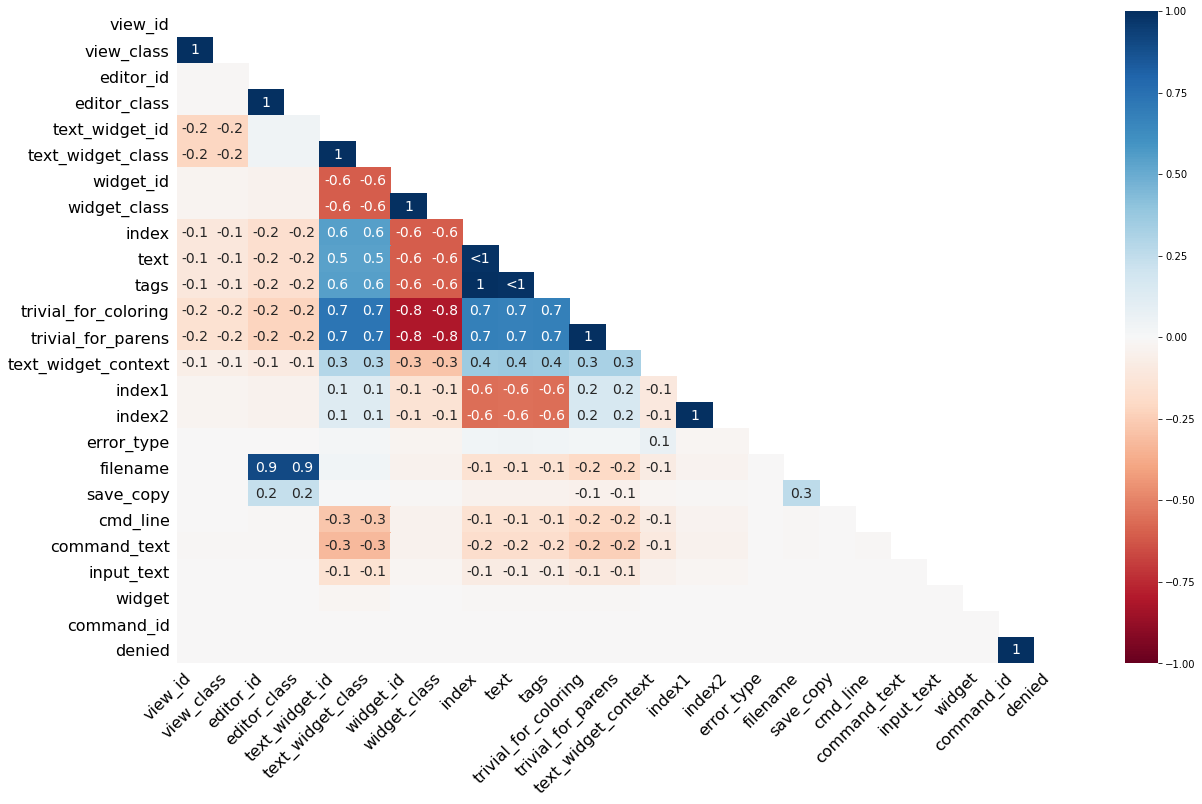

In [9]:
msno.heatmap(df) 

In [10]:
df.drop(columns=['denied','command_id', 'widget'])

,view_id,view_class,sequence,time,student_ID,score,editor_id,editor_class,text_widget_id,text_widget_class,...,trivial_for_parens,text_widget_context,index1,index2,error_type,filename,save_copy,cmd_line,command_text,input_text
0,ShellView,ShellView,ShowView,2020-03-23T14:33:24.525803,1,pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AssistantView,AssistantView,ShowView,2020-03-23T14:33:24.543817,1,pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,EditorTextCreated,2020-03-23T14:33:24.578842,1,pass,75874928.0,Editor,75874448.0,CodeViewText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NewFile,2020-03-23T14:33:24.579842,1,pass,75874928.0,Editor,75874448.0,CodeViewText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ShellView,ShellView,ShowView,2020-03-23T14:33:24.579842,1,pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109847,NaN,NaN,TextInsert,2020-05-14T15:59:38.295567,99,excellent,NaN,NaN,62161040.0,ShellText,...,False,shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109848,NaN,NaN,<FocusOut>,2020-05-14T15:59:39.585641,99,excellent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109849,NaN,NaN,<FocusIn>,2020-05-14T16:00:44.554357,99,excellent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109850,NaN,NaN,<Button-1>,2020-05-14T16:00:48.339574,99,excellent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Datetime

In [11]:

df['time'] = pd.to_datetime(df['time'])



# Target distribution


target distribution by student

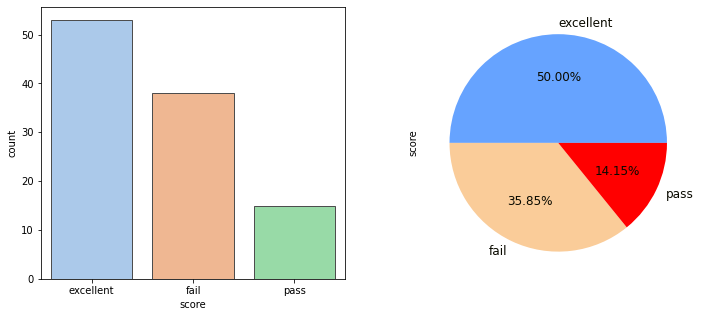

In [12]:
df_score_distribution_ID = df_score_student_ID.rename(columns={'Identificativo': 'student_ID', 'Voto verbalizzato' : 'score'})

df_score_distribution_ID["score"] = df_score_distribution_ID["score"].astype(pd.StringDtype())


df_score_distribution_ID.loc[df_score_distribution_ID['score'].str.contains('-'), 'score'] = '0'

df_score_distribution_ID["score"] = df_score_distribution_ID["score"].astype('int32')

# 0 = fail , 1 = pass, 2 = excellent

df_score_distribution_ID.loc[(df_score_distribution_ID['score'] >= 18) & (df_score_distribution_ID['score'] <= 26) , 'score'] = 1
df_score_distribution_ID.loc[df_score_distribution_ID['score'] > 26, 'score'] = 2

df_score_distribution_ID["score"] = df_score_distribution_ID["score"].astype(pd.StringDtype())

df_score_distribution_ID.loc[df_score_distribution_ID['score'].str.contains('0'), 'score'] = 'fail'
df_score_distribution_ID.loc[df_score_distribution_ID['score'].str.contains('1'), 'score'] = 'pass'
df_score_distribution_ID.loc[df_score_distribution_ID['score'].str.contains('2'), 'score'] = 'excellent'



fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))

sns.countplot(x=df_score_distribution_ID['score'], data=df_score_distribution_ID, palette="pastel",ax=ax[0], edgecolor=".3")

df_score_distribution_ID['score'].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99', '#FF0000'], 
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()


target distribution by event

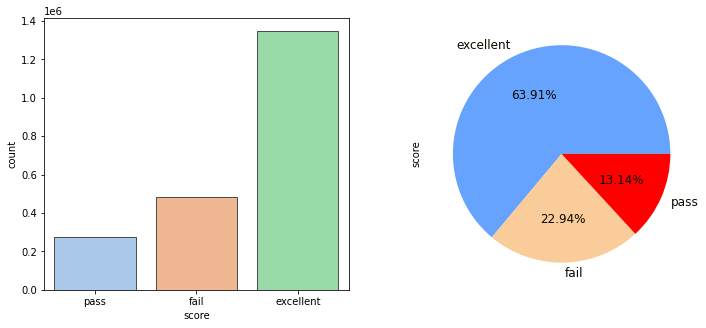

In [13]:

fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))

sns.countplot(x=df['score'], data=df, palette="pastel",ax=ax[0], edgecolor=".3")

df['score'].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99', '#FF0000'], 
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

# Errors


In [14]:
df_errors = df[df['error_type'].notna()]
#df_errors = df[df['text'].str.contains("Error", na=False)]
display_all(df_errors.head())

,view_id,view_class,sequence,time,student_ID,score,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,widget_class,index,text,tags,trivial_for_coloring,trivial_for_parens,text_widget_context,index1,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
20,NaN,NaN,TextInsert,2020-03-23 14:33:52.646012,1,pass,NaN,NaN,78015664.0,BaseShellText,NaN,NaN,4.0,ValueError: invalid literal for int() with bas...,"('io', 'stderr')",False,False,NaN,NaN,NaN,ValueError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,TextInsert,2020-03-23 14:38:45.693829,1,pass,NaN,NaN,54768912.0,ShellText,NaN,NaN,8.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NameError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,NaN,NaN,TextInsert,2020-03-23 14:39:53.491679,1,pass,NaN,NaN,54768912.0,ShellText,NaN,NaN,15.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NameError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,TextInsert,2020-03-23 14:41:16.309866,1,pass,NaN,NaN,54768912.0,ShellText,NaN,NaN,22.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NameError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,TextInsert,2020-03-23 14:41:29.322084,1,pass,NaN,NaN,54768912.0,ShellText,NaN,NaN,7.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NameError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_errors.shape

(7291, 29)

Print number of errors during the laboratory lessons grouped by the months

In [16]:
#as string
df_errors['error_type'].astype(str)


20             ValueError
101             NameError
137             NameError
170             NameError
189             NameError
                ...      
2108299       SyntaxError
2108546       SyntaxError
2108593         TypeError
2108890    AttributeError
2109392    AttributeError
Name: error_type, Length: 7291, dtype: object

Errors data cleaning

In [17]:
#df['prod_type'] = df['prod_type'].replace({'respon':'responsive', 'r':'responsive'})




df.drop(index=df[df['error_type'] == 'd={1'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'Errore'].index, inplace=True)
df.drop(index=df[df['error_type'] == '    raise LookupError()'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'def reverse_lookup(d, v)'].index, inplace=True)
df.drop(index=df[df['error_type'] == '## turtle.py'].index, inplace=True)

df.drop(index=df[df['error_type'] == "%Run 'Lab_07 RangeError.py'"].index, inplace=True)

df.drop(index=df[df['error_type'] == 'Help on built-in function remove'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'Help on class list in module builtins'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'Help on class range in module builtins'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'Help on class str in module builtins'].index, inplace=True)



#df.drop(index=df[df['error_type'].str.contains("raise")].index, inplace=True)

#df.drop(df['error_type'].str.contains(r'[Lookup]').index)


new_df_errors = df[df['error_type'].notna()]

Text(0, 0.5, 'Number of Errors')

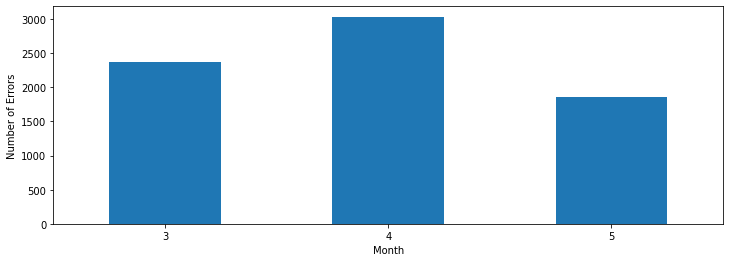

In [18]:
fig, axs = plt.subplots(figsize=(12, 4))
new_df_errors.groupby(new_df_errors["time"].dt.month)["error_type"].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Month")
plt.ylabel("Number of Errors")

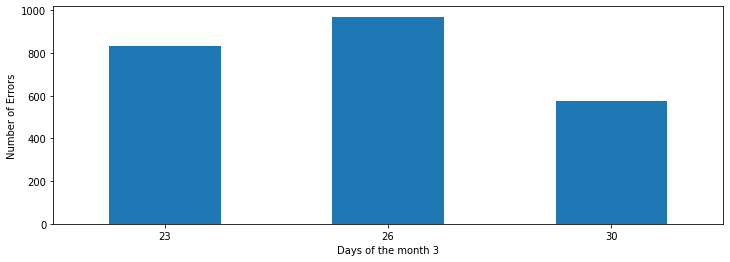

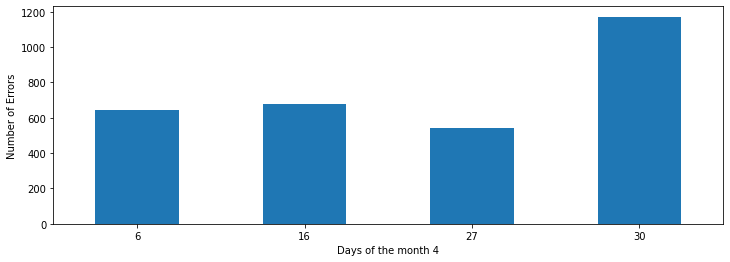

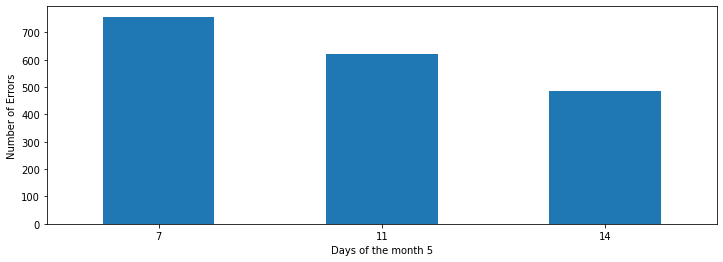

In [19]:
df_grouped_month = new_df_errors.groupby(df_errors["time"].dt.month)

for group_name, df_group in df_grouped_month:
    fig, axs = plt.subplots(figsize=(12, 4))
    df_group.groupby(df_group["time"].dt.day)["error_type"].count().plot(kind='bar', rot=0, ax=axs)
    plt.xlabel("Days of the month "+str(group_name))
    plt.ylabel("Number of Errors")


Text(0, 0.5, 'Number of Errors')

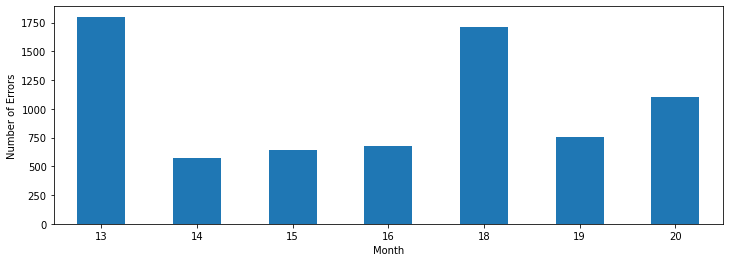

In [20]:
fig, axs = plt.subplots(figsize=(12, 4))
new_df_errors.groupby(new_df_errors["time"].dt.week)["error_type"].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Month")
plt.ylabel("Number of Errors")

In [21]:
new_df_errors.groupby(['error_type']).groups.keys()


dict_keys(['AssertionError', 'AttributeError', 'FileNotFoundError', 'ImportError', 'IndentationError', 'IndexError', 'KeyError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'RecursionError', 'SyntaxError', 'TabError', 'TypeError', 'UnboundLocalError', 'ValueError', 'ZeroDivisionError', '_tkinter.TclError', 'turtle.TurtleGraphicsError'])

Text(0, 0.5, 'Error type')

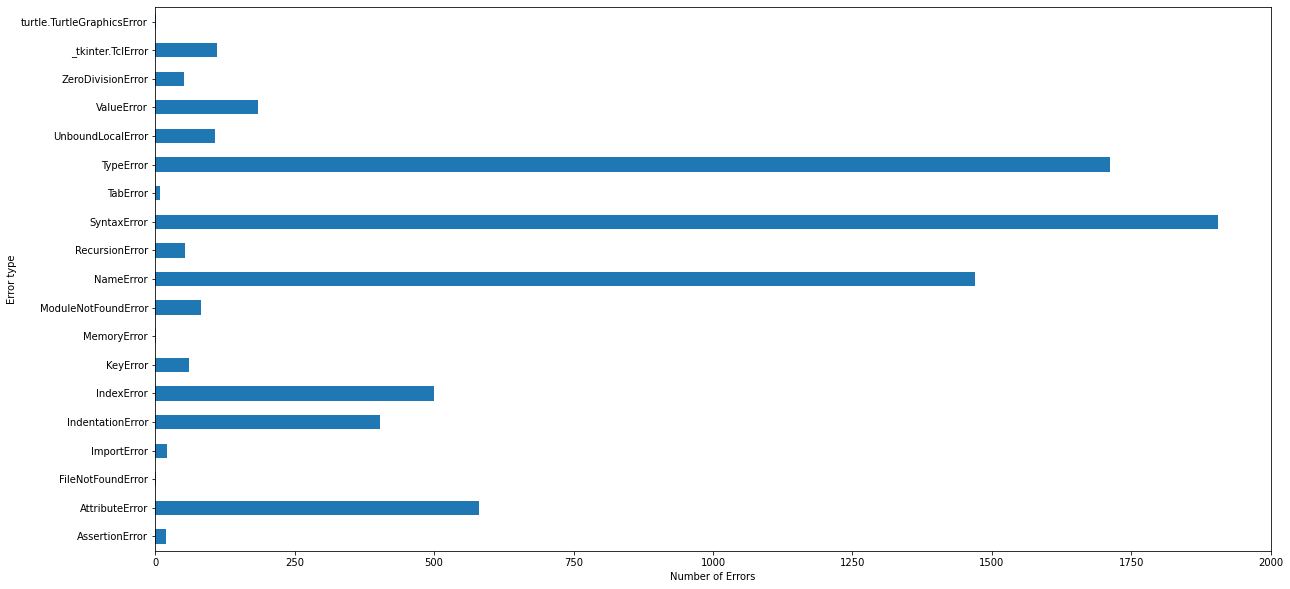

In [22]:
plt.figure(figsize=(20, 10))
new_df_errors.groupby(['error_type'])['error_type'].count().plot(kind='barh') 
plt.xlabel("Number of Errors")
plt.ylabel("Error type")

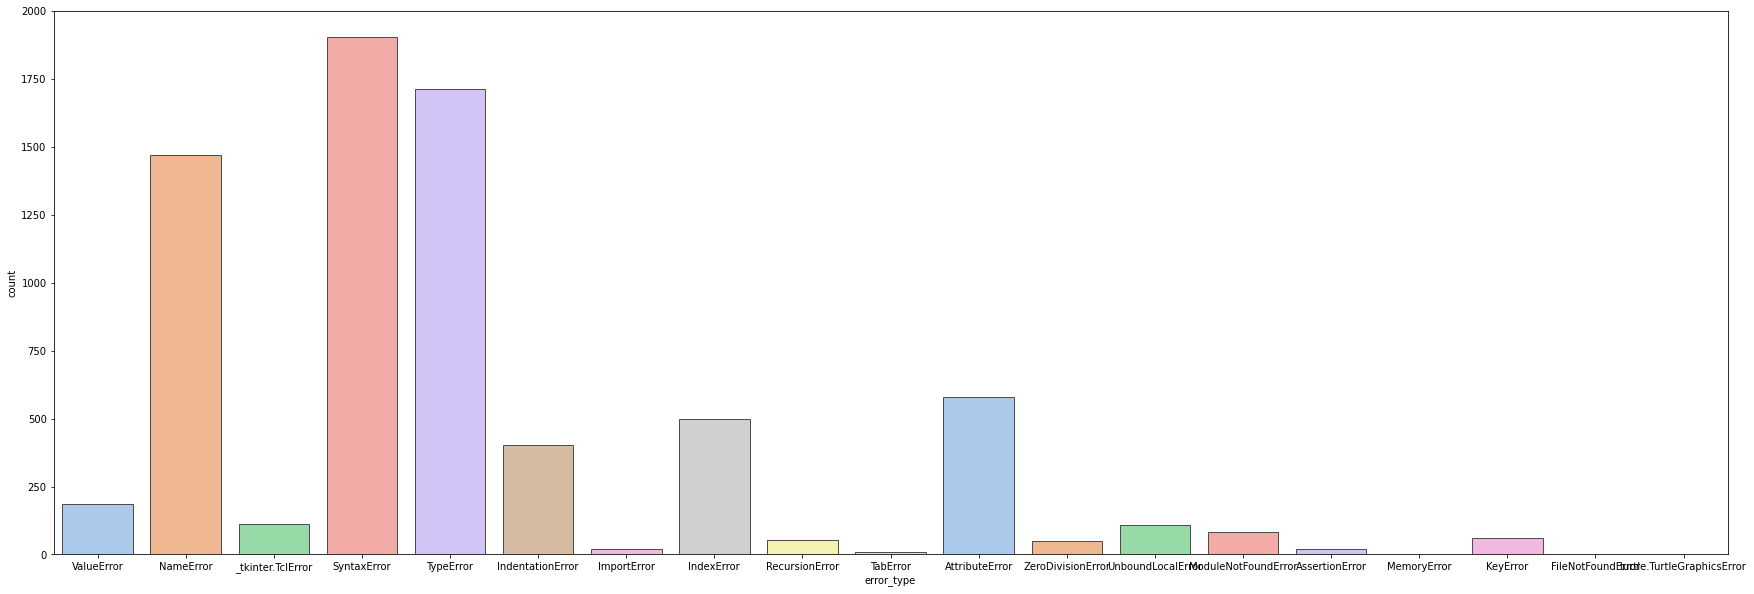

In [23]:
plt.figure(figsize=(30, 10))
sns.countplot(x=new_df_errors['error_type'], data=new_df_errors, palette="pastel", edgecolor=".3")

plt.show()

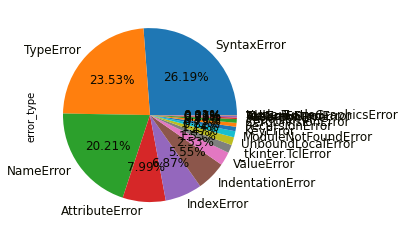

In [24]:
new_df_errors['error_type'].value_counts().plot.pie(autopct="%1.2f%%", 
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

Mean of errors per student

In [25]:
#Mean of errors per student
new_df_errors.groupby(['student_ID'])['error_type'].count().mean()

78.20430107526882

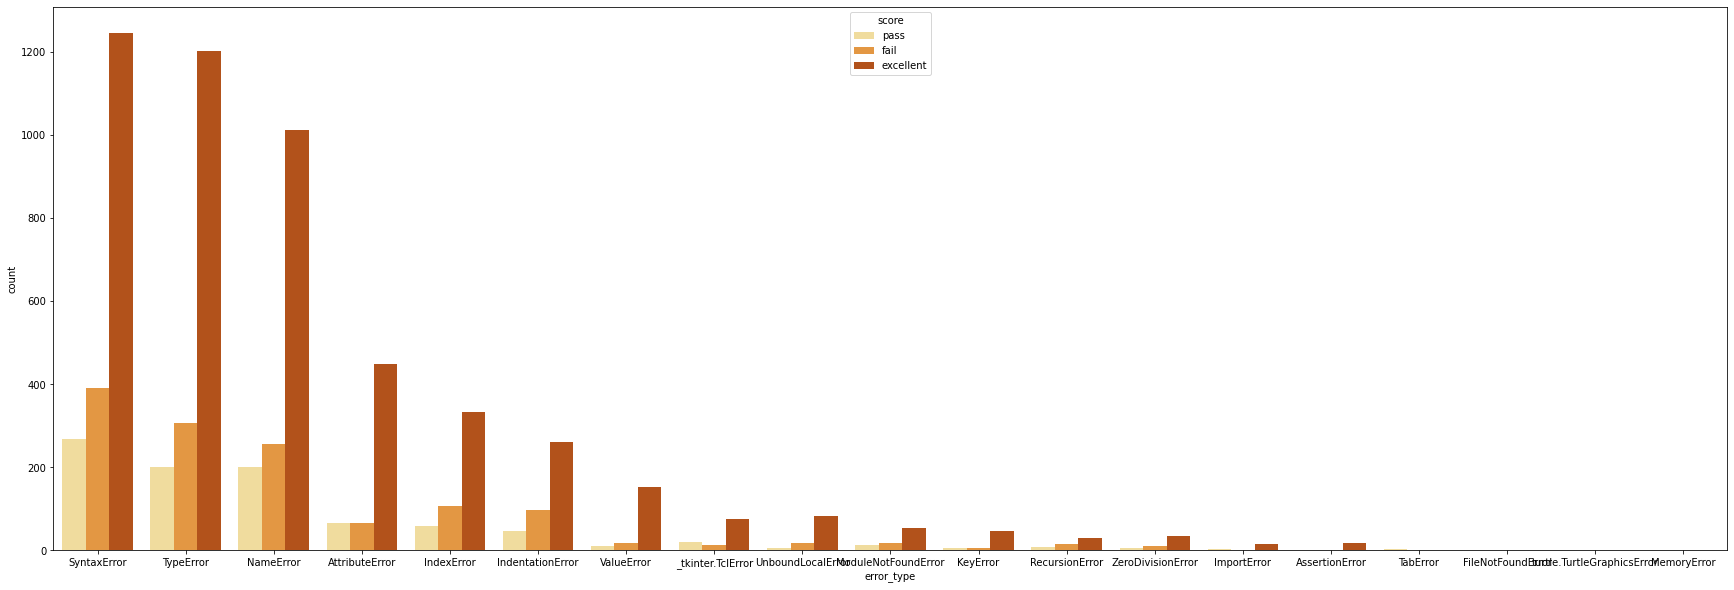

In [26]:
plt.figure(figsize=(30, 10))
sns.countplot(x="error_type", hue="score", data=df, palette="YlOrBr", order = df['error_type'].value_counts().index)
plt.show()

In [27]:
df.shape

(2109834, 29)

# Numer of Run

In [28]:
#df with Run 

df_command_text= df[df['command_text'].notna()]

df_run = df_command_text[df_command_text['command_text'].str.contains("%Run")]

#df_run.groupby(['student_ID'])['command_text'].count()

In [29]:
df_run

,view_id,view_class,sequence,time,student_ID,score,editor_id,editor_class,text_widget_id,text_widget_class,...,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
90,NaN,NaN,ShellCommand,2020-03-23 14:38:44.843547,1,pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run turtle.py\n,NaN,NaN,NaN,NaN
126,NaN,NaN,ShellCommand,2020-03-23 14:39:53.154439,1,pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run turtle.py\n,NaN,NaN,NaN,NaN
159,NaN,NaN,ShellCommand,2020-03-23 14:41:15.973628,1,pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run tartaruga.py\n,NaN,NaN,NaN,NaN
178,NaN,NaN,ShellCommand,2020-03-23 14:41:28.986765,1,pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run tartaruga.py\n,NaN,NaN,NaN,NaN
246,NaN,NaN,ShellCommand,2020-03-23 14:42:48.519844,1,pass,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run tarta.py\n,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109346,NaN,NaN,ShellCommand,2020-05-14 15:55:45.011224,99,excellent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run Lab14_1.py\n,NaN,NaN,NaN,NaN
2109441,NaN,NaN,ShellCommand,2020-05-14 15:56:25.143520,99,excellent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run Lab14_1.py\n,NaN,NaN,NaN,NaN
2109450,NaN,NaN,ShellCommand,2020-05-14 15:56:28.485711,99,excellent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run Lab14_1.py\n,NaN,NaN,NaN,NaN
2109801,NaN,NaN,ShellCommand,2020-05-14 15:59:20.885571,99,excellent,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run Lab14_1.py\n,NaN,NaN,NaN,NaN


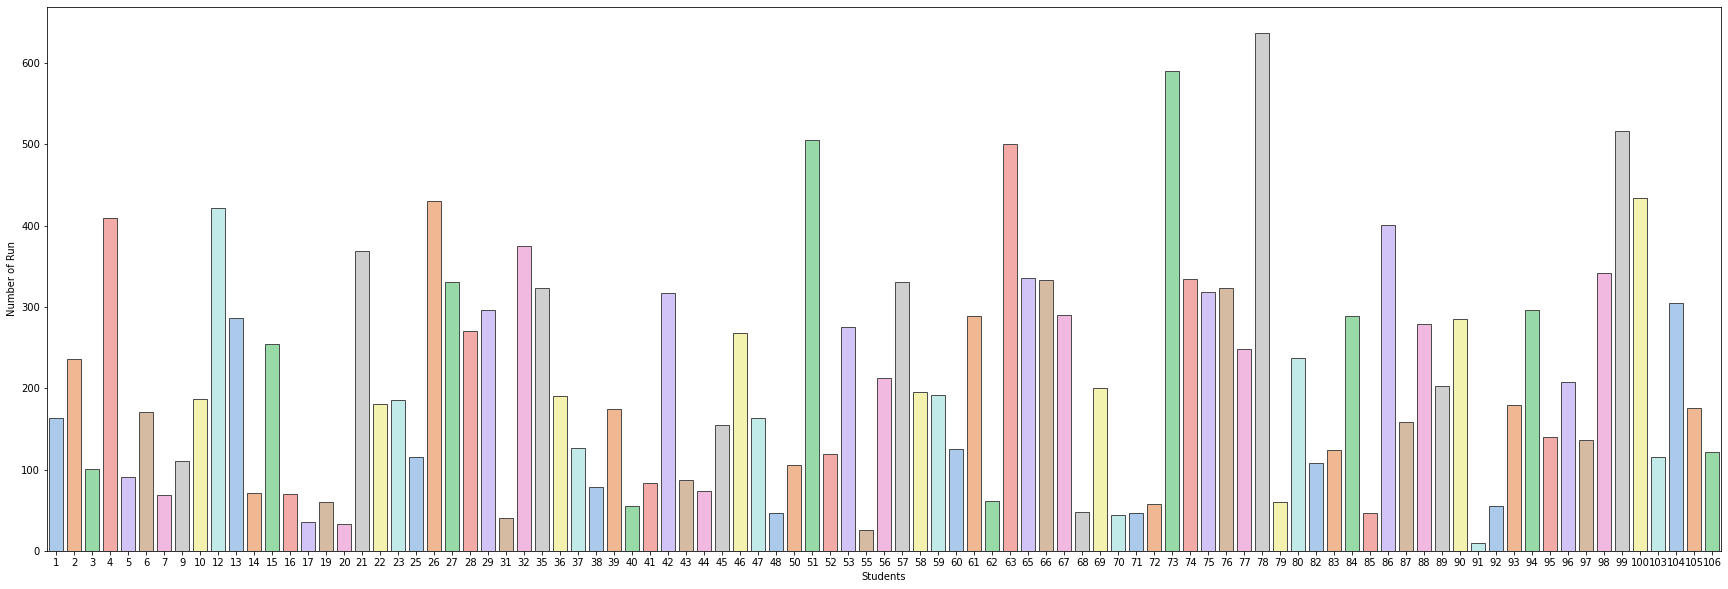

In [30]:
plt.figure(figsize=(30, 10))
sns.countplot('student_ID', data=df_run, palette="pastel", edgecolor=".3")

plt.xlabel("Students")
plt.ylabel("Number of Run")
plt.show()

Mean of run per student

In [31]:
#Mean of run per student
df_run.groupby(['student_ID'])['command_text'].count().mean()

209.43010752688173

Text(0, 0.5, 'Number of Run')

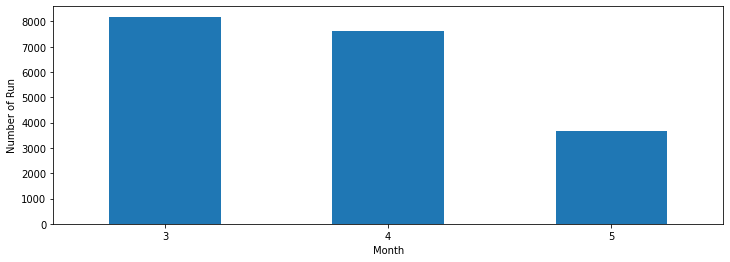

In [32]:
fig, axs = plt.subplots(figsize=(12, 4))
df_run.groupby(df_run["time"].dt.month)['command_text'].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Month")
plt.ylabel("Number of Run")

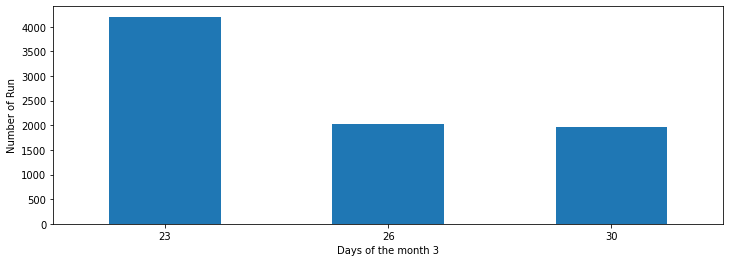

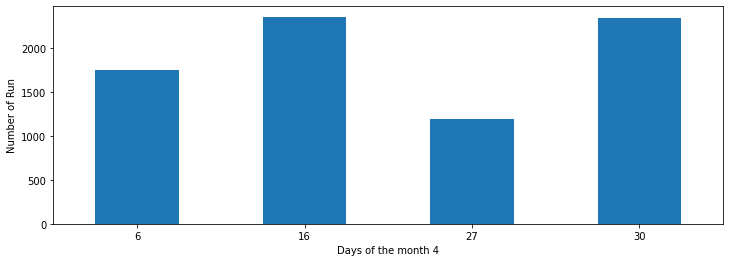

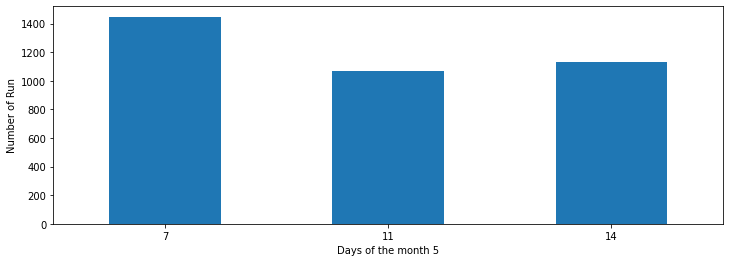

In [33]:
df_grouped_month_run = df_run.groupby(df_run["time"].dt.month)

for group_name_run, df_group_run in df_grouped_month_run:
    fig, axs = plt.subplots(figsize=(12, 4))
    df_group_run.groupby(df_group_run["time"].dt.day)['command_text'].count().plot(kind='bar', rot=0, ax=axs)
    plt.xlabel("Days of the month "+str(group_name_run))
    plt.ylabel("Number of Run")

Text(0, 0.5, 'Number of Run')

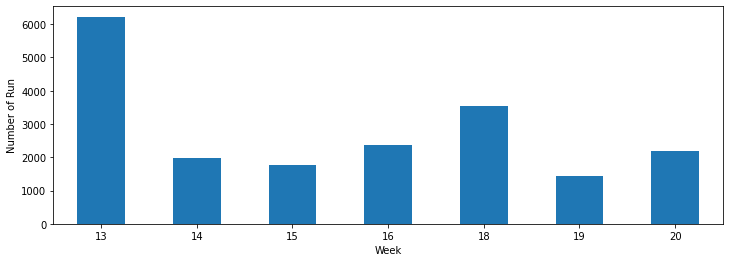

In [34]:
fig, axs = plt.subplots(figsize=(12, 4))
df_run.groupby(df_run["time"].dt.week)['command_text'].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Week")
plt.ylabel("Number of Run")

# Pasted text


In [35]:
df_sequence_paste= df[df['sequence'].notna()]

df_paste = df_sequence_paste[df_sequence_paste['sequence'].str.contains("<<Paste>>")]

In [36]:

df_paste

,view_id,view_class,sequence,time,student_ID,score,editor_id,editor_class,text_widget_id,text_widget_class,...,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
2104,NaN,NaN,<<Paste>>,2020-03-23 15:27:13.480797,1,pass,NaN,NaN,54768912.0,ShellText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,NaN,NaN,<<Paste>>,2020-03-23 15:30:17.190550,1,pass,NaN,NaN,54768912.0,ShellText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3516,NaN,NaN,<<Paste>>,2020-03-23 16:29:17.360904,1,pass,NaN,NaN,64777680.0,ShellText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3804,NaN,NaN,<<Paste>>,2020-03-23 16:35:07.833767,1,pass,NaN,NaN,64777680.0,ShellText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,<<Paste>>,2020-03-23 16:41:10.629713,1,pass,NaN,NaN,64777680.0,ShellText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108011,NaN,NaN,<<Paste>>,2020-05-14 15:29:52.944451,99,excellent,NaN,NaN,63131248.0,CodeViewText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108210,NaN,NaN,<<Paste>>,2020-05-14 15:32:19.641842,99,excellent,NaN,NaN,63131248.0,CodeViewText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108648,NaN,NaN,<<Paste>>,2020-05-14 15:41:02.653756,99,excellent,NaN,NaN,63131248.0,CodeViewText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109274,NaN,NaN,<<Paste>>,2020-05-14 15:53:15.062648,99,excellent,NaN,NaN,63131248.0,CodeViewText,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


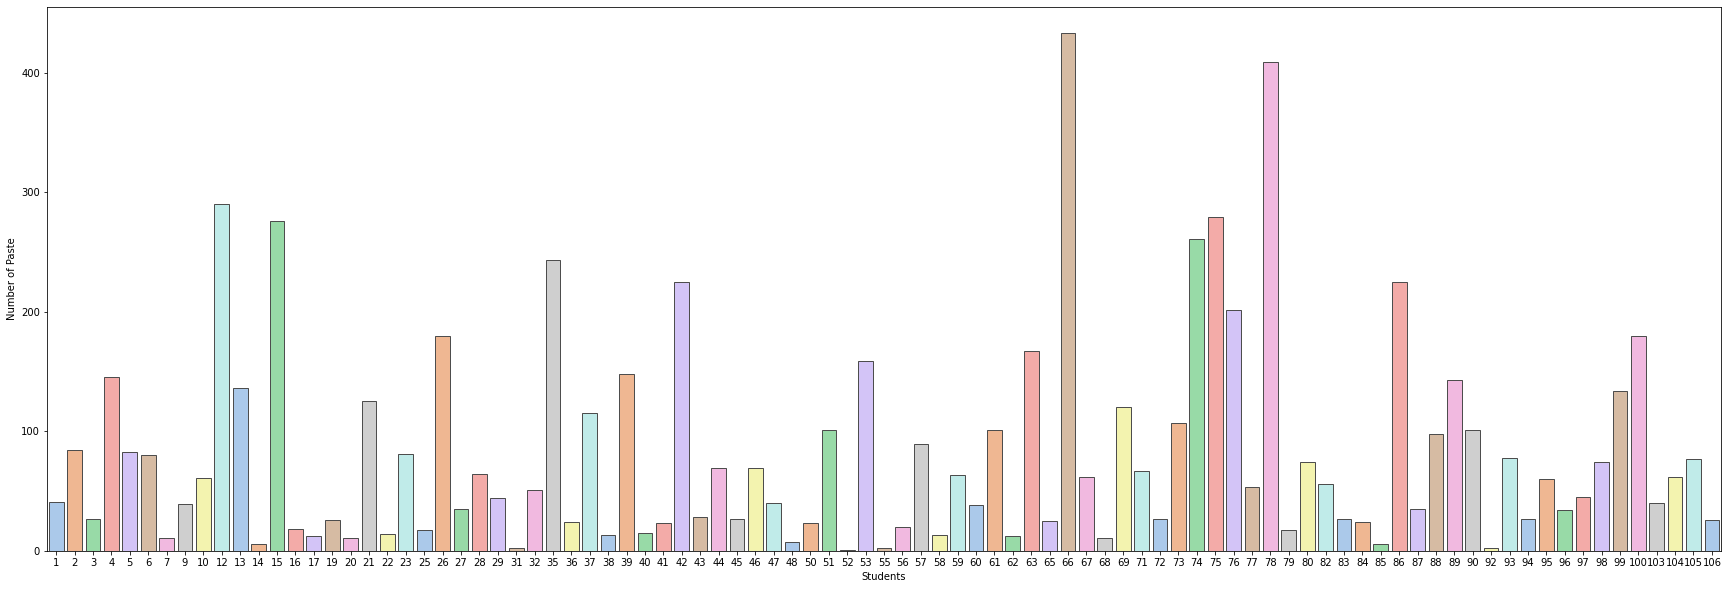

In [37]:
plt.figure(figsize=(30, 10))
sns.countplot('student_ID', data=df_paste, palette="pastel", edgecolor=".3")

plt.xlabel("Students")
plt.ylabel("Number of Paste")
plt.show()

Mean of text pasted per student

In [38]:
df_paste.groupby(['student_ID'])['sequence'].count().mean()

82.35164835164835

Text(0, 0.5, 'Number of Paste')

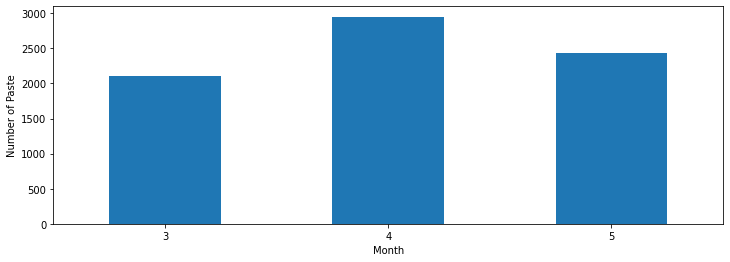

In [39]:
fig, axs = plt.subplots(figsize=(12, 4))
df_paste.groupby(df_paste["time"].dt.month)['sequence'].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Month")
plt.ylabel("Number of Paste")

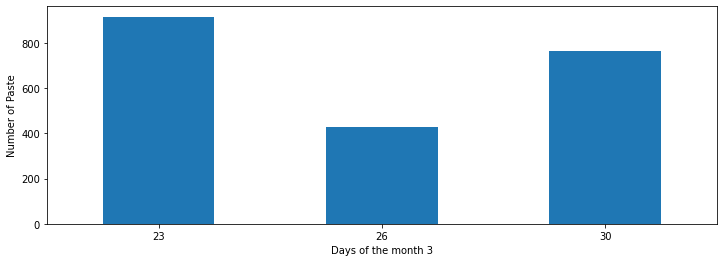

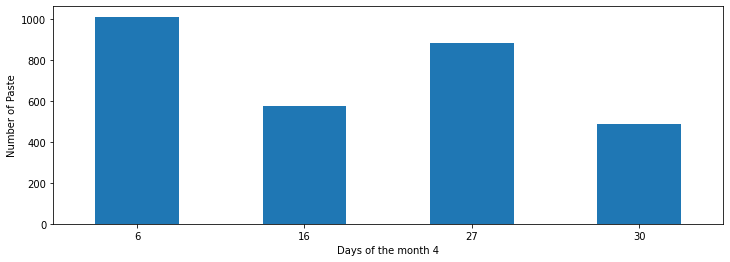

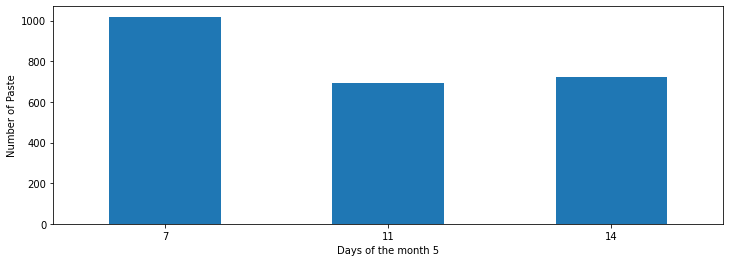

In [40]:
df_grouped_month_paste = df_paste.groupby(df_paste["time"].dt.month)

for group_name_paste, df_group_paste in df_grouped_month_paste:
    fig, axs = plt.subplots(figsize=(12, 4))
    df_group_paste.groupby(df_group_paste["time"].dt.day)['sequence'].count().plot(kind='bar', rot=0, ax=axs)
    plt.xlabel("Days of the month "+str(group_name_paste))
    plt.ylabel("Number of Paste")

Text(0, 0.5, 'Number of Paste')

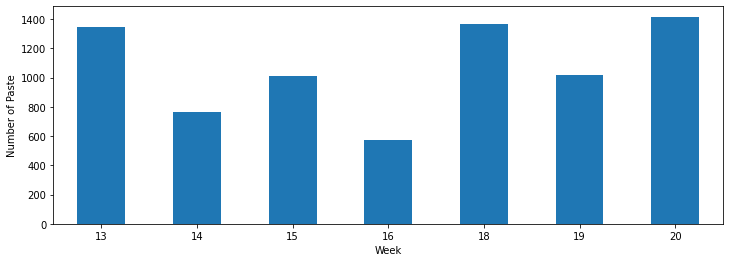

In [41]:
fig, axs = plt.subplots(figsize=(12, 4))
df_paste.groupby(df_paste["time"].dt.week)['sequence'].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Week")
plt.ylabel("Number of Paste")

In [42]:
a = new_df_errors.groupby(['student_ID']).count()
a

,view_id,view_class,sequence,time,score,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,...,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
student_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,77,77,77,0,0,77,77,0,...,0,77,0,0,0,0,0,0,0,0
2,0,0,98,98,98,0,0,98,98,0,...,0,98,0,0,0,0,0,0,0,0
3,0,0,33,33,33,0,0,33,33,0,...,0,33,0,0,0,0,0,0,0,0
4,0,0,135,135,135,0,0,135,135,0,...,0,135,0,0,0,0,0,0,0,0
5,0,0,19,19,19,0,0,19,19,0,...,0,19,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0,0,174,174,174,0,0,174,174,0,...,0,174,0,0,0,0,0,0,0,0
103,0,0,49,49,49,0,0,49,49,0,...,0,49,0,0,0,0,0,0,0,0
104,0,0,127,127,127,0,0,127,127,0,...,0,127,0,0,0,0,0,0,0,0


In [43]:
b =  df.pivot_table(index='student_ID', columns=['error_type'], 
                        aggfunc=len, fill_value=0)
b

cmd_line                                               \
error_type AssertionError AttributeError FileNotFoundError ImportError   
student_ID                                                               
1                       0              0                 0           1   
2                       3             12                 0           0   
3                       0              0                 0           0   
4                       0             12                 0           0   
5                       0              0                 0           0   
...                   ...            ...               ...         ...   
100                     1             32                 0           1   
103                     0              2                 0           1   
104                     1             16                 0           0   
105                     0              7                 0           0   
106                     0              6                 0           0   

                                                             \
error_type IndentationError IndexError KeyError MemoryError   
student_ID                                                    
1                         2          8        0           0   
2                         2          5        0           0   
3                         2          0        0           0   
4                         2          6        1           0   
5                         1          3        0           0   
...                     ...        ...      ...         ...   
100                      11         12        0           0   
103                       1          7        0           0   
104                       2         18        4           1   
105                       2          5        0           0   
106                       7          0        0           0   

                                          ... widget_id                 \
error_type ModuleNotFoundError NameError  ... NameError RecursionError   
student_ID                                ...                            
1                            0        21  ...        21              1   
2                            8        16  ...        16              0   
3                            0         7  ...         7              0   
4                            0        38  ...        38              2   
5                            0         0  ...         0              0   
...                        ...       ...  ...       ...            ...   
100                          2        28  ...        28              2   
103                          0        14  ...        14              0   
104                          0        16  ...        16              2   
105                          6        24  ...        24              0   
106                          1         8  ...         8              0   

                                                                        \
error_type SyntaxError TabError TypeError UnboundLocalError ValueError   
student_ID                                                               
1                   23        0        12                 0          1   
2                   23        0        16                 2          9   
3                   16        0         7                 0          1   
4                   35        0        29                 4          4   
5                   12        0         2                 0          1   
...                ...      ...       ...               ...        ...   
100                 30        0        43                 5          2   
103                 14        0         7                 0          1   
104                 24        0        35                 1          3   
105                 22        0         7                 0          2   
106                 18        0         7                 0          2   

                       